# 2018 Mashine Learning course at the Faculty of Physics, Astronomy and Applied Computer Science

## Lab class no. 1
by Piotr Warchoł

Durring this first class, we aim to level the playing field so everybody is more or less on the same page in terms of basics. Thus, this notebook is supposed to help you dive in to the world of Python programming in the context of Data Science and Mashine Learning. It is an amalgamation of a couple opensource notebooks, information and code readily available on the web, these are:
-  Juputer Notebook tips and tricks: https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
-  NumPy tutorial: https://docs.scipy.org/doc/numpy/user/quickstart.html
-  Matplotlib and pandas with the 20 years of games dataset using parts of a notebook by a Kaggle user Ashwin https://www.kaggle.com/piotr11w/20-years-of-games-analysis/edit?unified=1 
-  Overfitting vs Underfitting: http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html


You will:
- learn a couple of ways to help you efficently use Jupyter Notebooks
- refresh your memory on the NumPy library, learn about vectorization
- start generating simple plots in matplotlib
- learn the basics of pandas
- understand under and overfitting and the need for using a validation dataset 

### Jupyter Notebook tips and tricks

(read more about JN here http://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html)

Jupyter stores a list of keybord shortcuts under the menu at the top: Help > Keyboard Shortcuts, or by pressing H in command mode (press Esc to get there). 
#### Try it out now.

Another way to access keyboard shortcuts, and a handy way to learn them is to use the command palette: Cmd + Shift + P (or Ctrl + Shift + P on Linux and Windows). You can search the comands by name there.

While in command mode:

- A to insert a new cell above the current cell, B to insert a new cell below.

- M to change the current cell to Markdown, Y to change it back to code

- D + D (press the key twice) to delete the current cell

- Enter will take you from command mode back into edit mode for the given cell.

- Shift + Tab will show you the Docstring (documentation) for the the object you have just typed in a code cell - you 
can keep pressing this short cut to cycle through a few modes of documentation.

- Ctrl + Shift + - will split the current cell into two from where your cursor is.

- Esc + F Find and replace on your code but not the outputs.

- Esc + O Toggle cell output.

To execute a cell use Shif + Enter

#### Now, use the comands to add a cell below this which will print "Hello world!", then look at the acossiated documentation, toggle the ouput and then delete the cell.

You can also obtain the documentation of a given function by putting a "?" in front of it. Try ?str.replace()

By finishing a Jupyter cell with the name of a variable or unassigned output of a statement, Jupyter will display that variable without the need for a print statement. If you would like, the following command will make it print out all such variables irrespective of the place in the line in the cell you call fro them

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # change to "last" to go back to previous settings

In [2]:
a , b = 3, "bbb"
a
b

3

'bbb'

Being based on the IPython kernel, Jupyter has access to all the Magics from the IPython kernel, and they can make your life a lot easier!

In [3]:
# This will list all magic commands
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python

For example, the %who command without any arguments will list all variables that existing in the global scope. Passing a parameter like str will list only variables of that type.

In [4]:
%who str

b	 


There are two IPython Magic commands that are useful for timing - %%time and %timeit. These are especially handy when you have some slow code and you're trying to indentify where the issue is.

In [5]:
%%time
n=0
for i in range(1000):
    n=n+i

print(n)

499500
CPU times: user 510 µs, sys: 118 µs, total: 628 µs
Wall time: 539 µs


%%timeit uses the Python timeit module which runs a statement 100,000 times (by default) and then provides the mean of the fastest three times.



Note: you might also at some point checkout the tqdm module. You can use it to put a time bar on you loops.
I think it is not available on the clasroom machines at this point.

In [6]:
import numpy
%timeit numpy.random.normal(size=100) # draw an array of 100 random numers form the normal distribution

8.04 µs ± 893 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Here you can read the documentation of other http://ipython.readthedocs.io/en/stable/interactive/magics.html


It's easy to execute a shell command from inside your notebook:

In [7]:
! python3 --version
! ls 

Python 3.6.4
ML2018_01.ipynb   datasets          games.ipynb       handson-ml-master


Finally, I might be using some  LaTeX in the notebooks for the classes. 
Type in LaTeX in between  \ \ ( and   \ \ )
For example, this:

P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)}

should become:

\\( P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} \\)




### NumPy

Lets have a quick overview of the numpy package. 

NumPy is the fundamental package for scientific computing with Python. It contains among other things:
- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities
Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

See more at https://docs.scipy.org/doc/numpy/

In [8]:
import numpy as np

Some basics of dealing with numpy arrays

In [9]:
a = np.arange(15).reshape(3, 5)
a

print("the number of axes (dimensions) of the array: ", a.ndim)

print("an object describing the type of the elements in the array: ", a.dtype.name, ". One can create or specify dtype’s using standard Python types.")

print("Tupple of array sizes in each dimension: ", a.shape)

print("Number of elements in an array: ",a.size)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

the number of axes (dimensions) of the array:  2
an object describing the type of the elements in the array:  int64 . One can create or specify dtype’s using standard Python types.
Tupple of array sizes in each dimension:  (3, 5)
Number of elements in an array:  15


Ways to initiate an array

In [10]:
np.zeros( (3,4) )

np.ones( (2,3,4), dtype=np.int16 )                # dtype can also be specified

np.empty( (2,3) )                                 # uninitialized, output may vary

np.arange( 10, 30, 5 )                            # as a sequence of numbers

np.arange( 0, 2, 0.3 )                            # it accepts float arguments

np.random.random((2,3))                           # random on an interval [0,1]

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

array([10, 15, 20, 25])

array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8])

array([[ 0.95581359,  0.91229915,  0.35098739],
       [ 0.41433553,  0.58196446,  0.40608606]])

Operations on arrays.

Arithmetic operators on arrays apply elementwise

In [11]:
a = np.array( [20,30,40,50] )
"a" , a
b = np.arange( 4 )
"b", b

"a-b:"
a-b

"b * b:"
b**2


"boole (a<35):"
a<35

('a', array([20, 30, 40, 50]))

('b', array([0, 1, 2, 3]))

'a-b:'

array([20, 29, 38, 47])

'b * b:'

array([0, 1, 4, 9])

'boole (a<35):'

array([ True,  True, False, False], dtype=bool)

Unlike in many matrix languages, the product operator * operates elementwise in NumPy arrays. The matrix product can be performed using the dot function or method:

In [12]:
A = np.array( [[1,1],[0,1]] )
"A", A
B = np.array( [[2,0],[3,4]] )
"B", B

"A*B product elementwise:"
A*B                         

"matrix product:"
A.dot(B)                    

"or:"
np.dot(A, B)                

('A', array([[1, 1],
        [0, 1]]))

('B', array([[2, 0],
        [3, 4]]))

'A*B product elementwise:'

array([[2, 0],
       [0, 4]])

'matrix product:'

array([[5, 4],
       [3, 4]])

'or:'

array([[5, 4],
       [3, 4]])

Many unary operations, such as computing the sum of all the elements in the array, are implemented as methods of the ndarray class.

In [13]:
a = np.random.random((2,3))

a.sum()

a.min()

#By default, these operations apply to the array as though it were a list of numbers, regardless of its shape. 
#However, by specifying the axis parameter you can apply an operation along the specified axis of an array:

b = np.arange(12).reshape(3,4)
b

b.sum(axis=0)                            # sum of each column

b.min(axis=1)                            # min of each row

b.cumsum(axis=1)                         # cumulative sum along each row

1.2227358108235111

0.033496148072355569

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

array([12, 15, 18, 21])

array([0, 4, 8])

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38]])

Universal Functions
NumPy provides familiar mathematical functions such as sin, cos, and exp. In NumPy, these are called “universal functions”(ufunc). Within NumPy, these functions operate elementwise on an array, producing an array as output.

In [14]:
B = np.arange(3)
B

np.exp(B)

np.sqrt(B)

np.sin(B)

array([0, 1, 2])

array([ 1.        ,  2.71828183,  7.3890561 ])

array([ 0.        ,  1.        ,  1.41421356])

array([ 0.        ,  0.84147098,  0.90929743])

Array indexing

In [15]:
a = np.arange(10)**3
a

a[2]                    # 3rd element

a[2:5]                  # 3rd to 5th elements as an numpy array

a[:6:2] = -1000         # equivalent to a[0:6:2] = -1000; from start to position 6, exclusive, set every 2nd element to -1000
a

a[ : :-1]               # reversed a

for i in a:             # iterating through elements of a 
    print(i**(1/3.))

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])

8

array([ 8, 27, 64])

array([-1000,     1, -1000,    27, -1000,   125,   216,   343,   512,   729])

array([  729,   512,   343,   216,   125, -1000,    27, -1000,     1, -1000])

nan
1.0
nan
3.0
nan
5.0
6.0
7.0
8.0
9.0


/anaconda/envs/ML2018/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in power
  


Multidimensional arrays can have one index per axis. These indices are given in a tuple separated by commas:

In [16]:
def f(x,y):
    return 10*x+y

b = np.fromfunction(f,(5,4),dtype=int)
b

b[2,3]

b[0:5, 1]                       # each row in the second column of b

b[ : ,1]                        # equivalent to the previous example

b[1:3, : ]                      # each column in the second and third row of b


array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

23

array([ 1, 11, 21, 31, 41])

array([ 1, 11, 21, 31, 41])

array([[10, 11, 12, 13],
       [20, 21, 22, 23]])

Vectorization is the art of writtin your code without using loops. This way the execution is often much quicker.

#### Generate two random vectors of length 100000 and perform vector multiplication with a for loop and with a numpy dot product. Time how the two methods perform.

### Basics of pandas and plotting with matplotlib

In [17]:
InteractiveShell.ast_node_interactivity = "last" 

In [18]:
import pandas as pd 
import matplotlib.pyplot as plt
#import seaborn as sns # makes matplotlib plots prettier

Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.  The name is derived from the term "panel data", an econometrics term for data sets that include both time-series and cross-sectional data.

Library features include:
- DataFrame object for data manipulation with integrated indexing.
- Tools for reading and writing data between in-memory data structures and different file formats.
- Data alignment and integrated handling of missing data.
- Reshaping and pivoting of data sets.
- Label-based slicing, fancy indexing, and subsetting of large data sets.
- Data structure column insertion and deletion.
- Group by engine allowing split-apply-combine operations on data sets.
- Data set merging and joining.
- Hierarchical axis indexing to work with high-dimensional data in a lower-dimensional data structure.
- Time series-functionality: Date range generation[4] and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging.


The library is highly optimized for performance, with critical code paths written in Cython or C. 
The usage might feel complicated at first but when befriended, the library becomes an indispensible tool of a data scientist.

We will cover only a tiny fraction of what it allows to do but this intends to be just a starting point for you.

First we import the data from a csv file 
(a comma-separated values (CSV) file stores tabular data (numbers and text) in plain text).
It will automatically become a pandas dataframe.

In [19]:
# make sure you have the dataset ign in the proper directory, or modify the path belo accordingly
games=pd.read_csv('../ML.2018/datasets/ign.csv')

These are data on video game reviews from IGN, a popular video game review site. The data was scraped by Eric Grinstein, and can be found on kaggle https://www.kaggle.com/egrinstein/20-years-of-games .

In [20]:
# to see the first five rows of a pandas dataframe:
games.head()

#games.head(10)  # first ten
#games.tail(4)   # last 4

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [21]:
# to learn more about the contents:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 11 columns):
Unnamed: 0        18625 non-null int64
score_phrase      18625 non-null object
title             18625 non-null object
url               18625 non-null object
platform          18625 non-null object
score             18625 non-null float64
genre             18589 non-null object
editors_choice    18625 non-null object
release_year      18625 non-null int64
release_month     18625 non-null int64
release_day       18625 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 1.6+ MB


You can see for example, that some games don't have a genre.

In [22]:
# the "Unnamed" column is just a leftover index, we can drop it. Notice that this will modify the data frame, 
#so calling this cell again will produce an error
games.drop(['Unnamed: 0','url'],axis=1,inplace=True) #dropping the unneeded values
#games.info()

Lest make a short break for introducing:

### Matplolib

Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits. 

Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code.

See examples here https://matplotlib.org/tutorials/introductory/sample_plots.html.

The basics are:

In [23]:
# some magic to show plots in the notebook properly
%matplotlib inline 

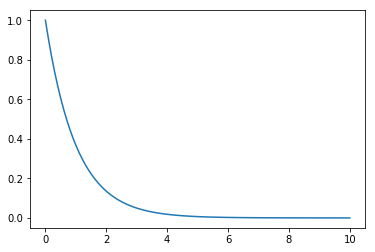

In [24]:
# a line plot
a = np.linspace(0,10,100)
b = np.exp(-a)
plt.plot(a,b)
plt.show()

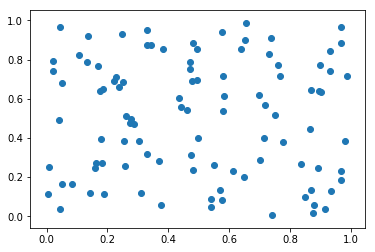

In [25]:
# a scatter plot
a = np.random.random(100)
b = np.random.random(100)
plt.scatter(a,b)
plt.show()

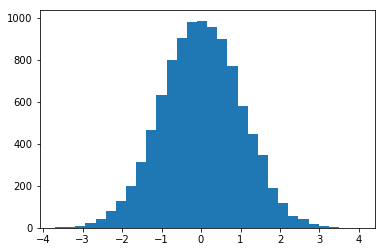

In [26]:
# a histogram
x = np.random.normal(size=10000)
plt.hist(x,bins=30)
plt.show()

Back to the games dataset

In [27]:
# I would like to know what is the maximal release year of the games in the dataset
games.release_year.max()

2016

In [28]:
games.release_year.min()

1970

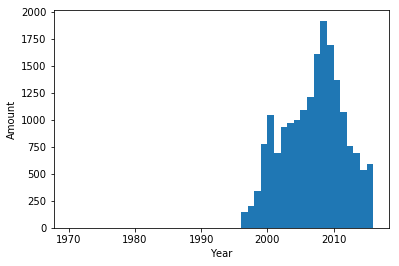

In [29]:
# Lets plot the amount of games released by year. 
# Now I know that there will be 46 years inbetween the earliest and the latest.
# Thus, I use as many bins
x=games.release_year.values
plt.hist(x, bins=46)
plt.ylabel('Amount');
plt.xlabel('Year');

In [33]:
# There is an outlier in 1970 an maybe later. Let me remove it.
# I acces the entry with its dataframe index
games.drop(games.index[516],inplace=True) 

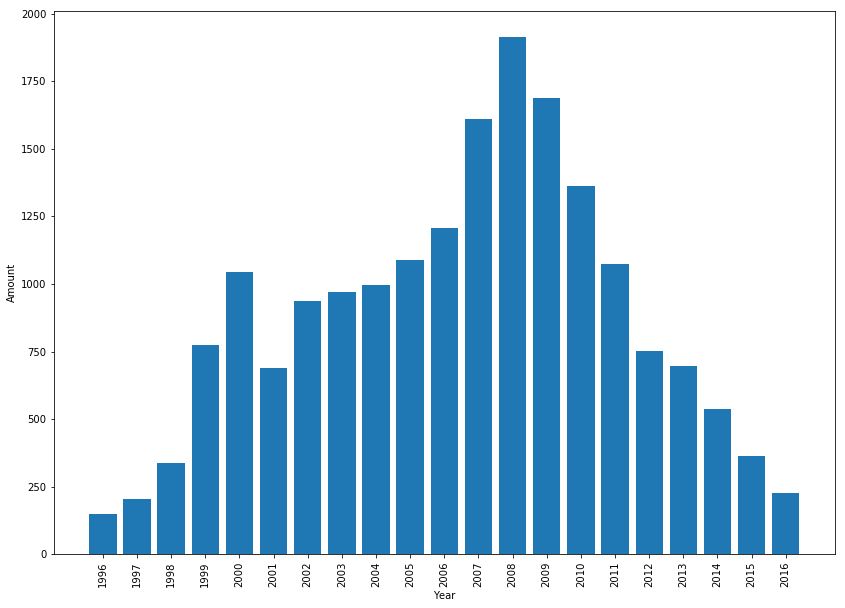

In [34]:
# Lets generate a bar plot this time 
fig,ax=plt.subplots(1,figsize=(14,10))
x =games.groupby('release_year')['title'].count().index.values
plt.bar(x, games.groupby('release_year')['title'].count().values)

plt.ylabel('Amount');
plt.xlabel('Year');
plt.xticks(x,tuple(np.arange(games.release_year.min(), games.release_year.max()+1)), rotation=90);

#### Using pandas and matplotlib examples and documentation on the web, plot the distribution (histogram) of the scores of games from 2008. Find the mean of those scores and show it on the plot. Find out what genre has the highest mean score acrose the fool time period (hint: use groupby and mean()).

#### You can further explore the dataset after you finish the last part of the notebook

Here is a pandas cheat-sheet https://www.dataquest.io/blog/large_files/pandas-cheat-sheet.pdf

and documentation https://pandas.pydata.org/pandas-docs/stable/

### Underfitting, overfitting and validation 

This example demonstrates the problems of underfitting and overfitting and how we can use linear regression with polynomial features to approximate nonlinear functions. 

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

Sklearn is the go to python library for machine learning. 

It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

In this class we will mostly use it to cross check our own code, but afterward it might become your main machine learning tool.

Learn more at http://scikit-learn.org/stable/

In [ ]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

This cosine will be our true function. 

Imagine we don't know it and that it describes some mysterious phenomenon we want to understand.

What we have however, ar some measurments. They are not perfect - there is a certain amount of noise associated and they don't cover uniformely the whole spectrum of possible arguments of the true function. They are:

In [43]:
np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

Now, we would like to approximate the true function with a polynomial based on the data we have. This will be done by our Linear Regression model - how, you will learn later. What we have to decide on however, is the degree of the polynomial we wil use. 

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally.

In scikit-learn a random split into training and test sets can be quickly computed with the train_test_split helper function. Here, we eill use cross_val_score function, which automatically calculates a cross validation score based on a metric (scoring argument). See http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html . With cv=10 the data is split into 10 folds and each fold is used to validate while the others for training.

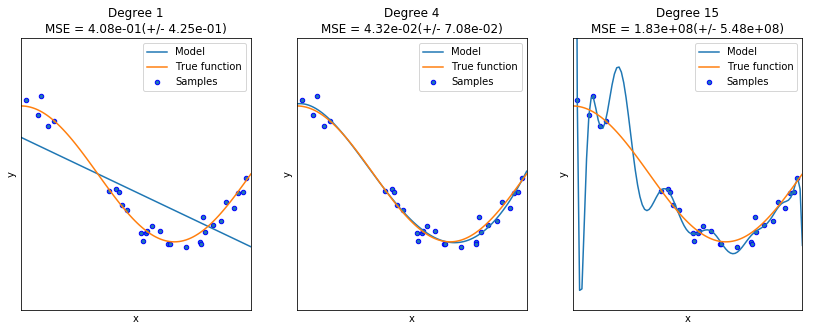

In [44]:
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

The plot shows the function that we want to approximate, which is a part of the cosine function. In addition, the samples from the real function and the approximations of different models are displayed. The models have polynomial features of different degrees. We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called underfitting. A polynomial of degree 4 approximates the true function almost perfectly. However, for higher degrees the model will overfit the training data, i.e. it learns the noise of the training data. We evaluate quantitatively overfitting / underfitting by using cross-validation. We calculate the mean squared error (MSE) on the validation set, the higher, the less likely the model generalizes correctly from the training data.

## Warm up homework:

#### Plot how the mean square error changes with the polynomial degree ranging between 1 and 30. Do this for the cosine and some other function of your choosing. See what happens if you increase the measurment noise. 

This is very small so you have one week. You can send the associate, SEPARATE notebook to my e-mail. 
If you still have time, you can do it durring this first class.